In [2]:
import numpy as np 
import matplotlib.pyplot as plt
import pandas as pd 


Index(['Murder', 'Assault', 'UrbanPop', 'Rape'], dtype='object')
Centering the data
Reducing the data


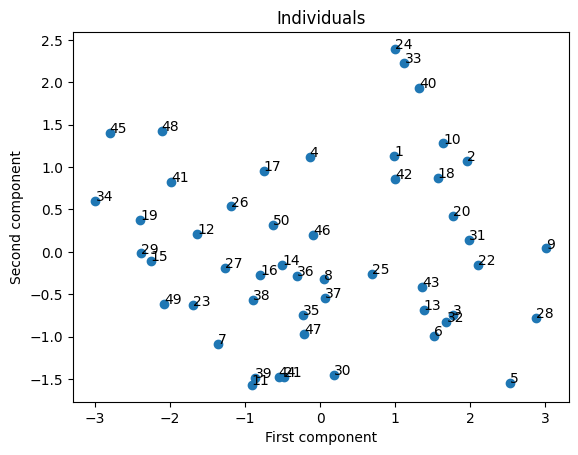

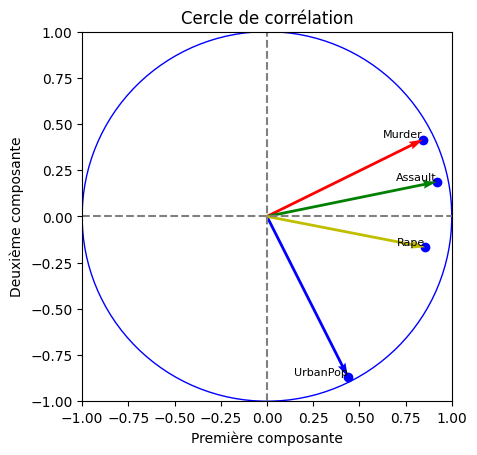

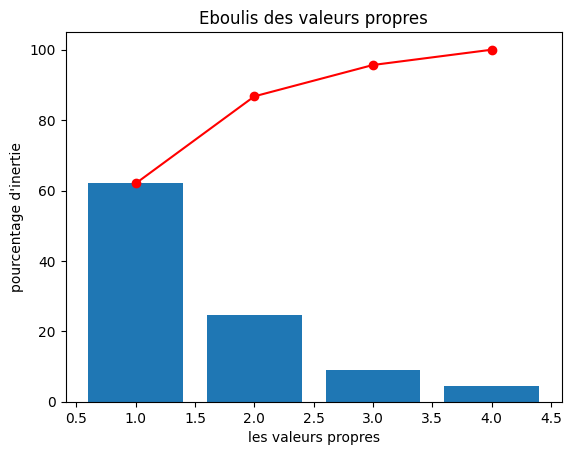

Contribution individuelle de toutes les composantes 
 [[7.83262502e-03 2.59572340e-02]
 [3.06666679e-02 2.32739391e-02]
 [2.50680877e-02 1.12441121e-02]
 [1.61272181e-04 2.53382297e-02]
 [5.13697999e-02 4.81052558e-02]
 [1.84973970e-02 1.97069991e-02]
 [1.48850252e-02 2.39605113e-02]
 [1.83544876e-05 2.13906157e-03]
 [7.32059635e-02 3.10957857e-05]
 [2.16692512e-02 3.30521572e-02]
 [6.71662852e-03 4.98369667e-02]
 [2.16829165e-02 8.99396625e-04]
 [1.53323354e-02 9.39429734e-03]
 [2.06021212e-03 4.64174840e-04]
 [4.09550477e-02 2.18784223e-04]
 [5.12062637e-03 1.47487447e-03]
 [4.54624545e-03 1.85621363e-02]
 [1.97452967e-02 1.53316413e-02]
 [4.63244520e-02 2.86271179e-03]
 [2.50739414e-02 3.69560320e-03]
 [1.90592450e-03 4.39324402e-02]
 [3.58475087e-02 4.87957598e-04]
 [2.31039730e-02 8.07776043e-03]
 [8.00729425e-03 1.15790280e-01]
 [3.91504268e-03 1.40145863e-03]
 [1.13319302e-02 5.82429256e-03]
 [1.29167728e-02 7.60140911e-04]
 [6.66237034e-02 1.21555232e-02]
 [4.58266060e-02 6.607

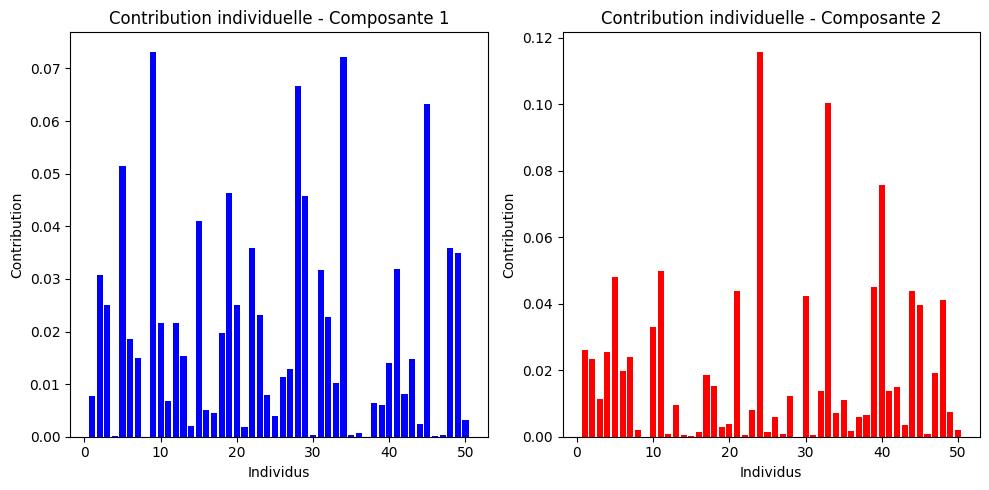

In [5]:
class Acp:
    def __init__(self, center=True, reduce=True):
        self.center = center
        self.reduce = reduce
        self.matrix = None
        self.dimension = None
        self.ValeurPropre = None
        self.VecteurPropre = None
        self.composantes_principales = None
        self.contributions = None

    def validate_boolean(self, value, name):
        if not isinstance(value, bool):
            raise ValueError(f"{name} must be a boolean")

    def scale_center(self, matrix):
        if self.center:
            print("Centering the data")
            self.matrix = matrix - np.mean(matrix, axis=0)

    def scale_center_reduce(self, matrix):
        if self.reduce:
            print("Reducing the data")
            sd = np.std(matrix, axis=0)
            self.matrix = self.matrix / sd

    def fit(self, dimension):
        n = self.matrix.shape[0]
        matrix_covariance = (1 / n) * np.dot(self.matrix.T, self.matrix)
        eignValues, eignVectors = np.linalg.eig(matrix_covariance)
        positive_eigenvalues = eignValues[eignValues > 0]
        positive_eigenvectors = eignVectors[:, eignValues > 0]
        sorted_indices = np.argsort(positive_eigenvalues)[::-1]
        self.ValeurPropre = positive_eigenvalues[sorted_indices]
        self.VecteurPropre = positive_eigenvectors[:, sorted_indices]
        self.dimension = min(dimension, self.VecteurPropre.shape[1])

    def transform(self):
        self.composantes_principales = np.dot(self.matrix, self.VecteurPropre)

    def fit_transform(self, matrix, dimension):
        self.scale_center(matrix)
        self.scale_center_reduce(matrix)
        self.fit(dimension)
        self.transform()

    def get_property(self):
        return self.ValeurPropre, self.VecteurPropre, self.composantes_principales, self.matrix

    def plot_individuals(self):
        if self.dimension == 2 or self.dimension == 3:
            plt.figure()
            if self.dimension == 2:
                plt.scatter(self.composantes_principales[:, 0], self.composantes_principales[:, 1])
                plt.xlabel("First component")
                plt.ylabel("Second component")
            elif self.dimension == 3:
                fig = plt.figure()
                ax = fig.add_subplot(111, projection='3d')
                ax.scatter(self.composantes_principales[:, 0], self.composantes_principales[:, 1], self.composantes_principales[:, 2])
                ax.set_xlabel("First component")
                ax.set_ylabel("Second component")
                ax.set_zlabel("Third component")
            for i in range(self.composantes_principales.shape[0]):
                plt.text(self.composantes_principales[i, 0], self.composantes_principales[i, 1], str(i+1))
            plt.title("Individuals")
            plt.show()
        else:
            print("We can't plot more than 3 components")

    def plot_cercle_correlation(self, colors,variables):
        if self.dimension < 2:
            print("The circle of correlation can be plotted only for 2 components")
            return

        plt.figure()
        coordonne = np.array([np.sqrt(self.ValeurPropre[0]) * self.VecteurPropre[:, 0],
                              np.sqrt(self.ValeurPropre[1]) * self.VecteurPropre[:, 1]]).T

        plt.scatter(coordonne[:, 0], coordonne[:, 1], color='b')

        plt.plot([-1, 1], [0, 0], color='grey', ls='--')
        plt.plot([0, 0], [-1, 1], color='grey', ls='--')

        for i, (x, y) in enumerate(coordonne, 1):
            plt.quiver(0, 0, x, y, color=colors[i-1], scale=1, scale_units='xy', angles='xy')
            plt.text(x, y, variables[i-1], fontsize=8, verticalalignment='bottom', horizontalalignment='right')

        circle = plt.Circle((0, 0), 1, facecolor='none', edgecolor='b')
        plt.gca().add_patch(circle)

        plt.title("Cercle de corrélation")
        plt.xlabel("Première composante")
        plt.ylabel("Deuxième composante")
        plt.xlim(-1, 1)
        plt.ylim(-1, 1)
        plt.gca().set_aspect('equal', adjustable='box')
        plt.show()

    def plot_inertie_information(self):
        plt.figure()
        inertie = self.ValeurPropre / np.sum(self.ValeurPropre)*100
        plt.bar(np.arange(1, self.ValeurPropre.shape[0] + 1), inertie )
        plt.plot(np.arange(1, self.ValeurPropre.shape[0] + 1), inertie.cumsum(), c="red", marker='o')
        plt.xlabel("les valeurs propres")
        plt.ylabel("pourcentage d'inertie")
        plt.title("Eboulis des valeurs propres")
        plt.show()

    def contribution_indviduelle(self):
        self.contributions = np.array([self.composantes_principales[:, i]**2/(self.ValeurPropre[i]*self.matrix.shape[0]) for i in range(self.dimension)]).T  
        print("Contribution individuelle de toutes les composantes \n", self.contributions)

    def plot_contribution(self):
        plt.figure(figsize=(10, 5))
        plt.subplot(1, 2, 1)
        plt.bar(np.arange(1, self.contributions.shape[0] + 1), self.contributions[:, 0], color='b', label='Composante 1')
        plt.xlabel("Individus")
        plt.ylabel("Contribution")
        plt.title("Contribution individuelle - Composante 1")
        if self.dimension >= 2:
            plt.subplot(1, 2, 2)
            plt.bar(np.arange(1, self.contributions.shape[0] + 1), self.contributions[:, 1], color='r', label='Composante 2')
            plt.xlabel("Individus")
            plt.ylabel("Contribution")
            plt.title("Contribution individuelle - Composante 2")
            plt.tight_layout()
            plt.show()
        else:
            print("We can't plot the second component because it doesn't exist")


# Test the class
acp = Acp()
df=pd.read_csv('dataset-90380.csv')
data=df.values
acp.fit_transform(data, 2)
acp.plot_individuals()
acp.plot_cercle_correlation(['r', 'g', 'b','y'],['Murder', 'Assault', 'UrbanPop', 'Rape'])
acp.plot_inertie_information()
acp.contribution_indviduelle()
acp.plot_contribution()
